# Proyecto Deep Learning con CIFAR-10

Parte 1: Introducción Teórica
¿Qué es Deep Learning?
El Deep Learning (aprendizaje profundo) es una rama del Machine Learning que utiliza redes neuronales con múltiples capas (de ahí el "deep"). Estas redes aprenden representaciones jerárquicas de los datos: desde patrones simples hasta abstracciones complejas.

¿Por qué usar redes neuronales profundas para imágenes?
Las imágenes tienen alta dimensionalidad (cada píxel es una característica), y estructuras espaciales importantes (como bordes, formas, colores, etc.). Las redes convolucionales (CNN) son especialmente buenas para capturar estas relaciones espaciales, sin necesidad de extraer manualmente características.

| Tipo de Capa   | Función                                                     | Parámetros Clave                     |
| -------------- | ----------------------------------------------------------- | ------------------------------------ |
| `Conv2D`       | Extrae características locales con filtros (kernels)        | Número de filtros, tamaño del kernel |
| `MaxPooling2D` | Reduce la dimensionalidad y preserva información importante | Tamaño del pool                      |
| `Flatten`      | Aplana la salida para conectarla a capas densas             | -                                    |
| `Dense`        | Capas totalmente conectadas                                 | Número de neuronas                   |
| `Dropout`      | Reduce overfitting desactivando neuronas al azar            | Tasa de dropout                      |


# Parte 2: Definición del problema
Dataset: CIFAR-10
Tamaño: 60,000 imágenes

Tamaño imagen: 32x32 píxeles, 3 canales (RGB)

Clases: 10 (avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco, camión)

Formato: 50,000 para entrenamiento, 10,000 para prueba

# Parte 3: Arquitectura del Modelo
Antes de escribir código, definimos nuestra arquitectura base:

📐 Arquitectura propuesta (CNN simple)
Input: Imagen 32x32x3

Conv2D(32, kernel_size=3x3, activation='relu')

MaxPooling2D(pool_size=2x2)

Conv2D(64, kernel_size=3x3, activation='relu')

MaxPooling2D(pool_size=2x2)

Flatten()

Dense(128, activation='relu')

Dropout(0.5)

Dense(10, activation='softmax')

# ¿Cuándo usar Deep Learning?
Deep Learning no es solo para imágenes. Es aplicable a una gran variedad de problemas, especialmente cuando hay grandes volúmenes de datos, relaciones complejas entre las variables o datos no estructurados.

| Tipo de dato   | Ejemplo de problema                   | Tipo de red sugerida        |
| -------------- | ------------------------------------- | --------------------------- |
| Imagen         | Clasificar cáncer en imágenes médicas | CNN                         |
| Texto          | Detectar spam en emails               | RNN / Transformer           |
| Audio          | Identificar idioma en una llamada     | CNN o RNN                   |
| Tabular        | Predecir fraudes bancarios            | Dense (con cuidado)         |
| Serie temporal | Predecir ventas de un producto        | LSTM / Transformer temporal |


# 📌 Conclusión
Deep Learning es muy versátil, pero:

Brilla cuando los datos son complejos o no estructurados (imágenes, texto, audio).

Requiere mucho más poder computacional y datos.

En problemas con pocos datos o variables, otros modelos (árboles, SVM, etc.) suelen ser más eficientes.

# Parte 4: Implementación en código (Google Colab)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


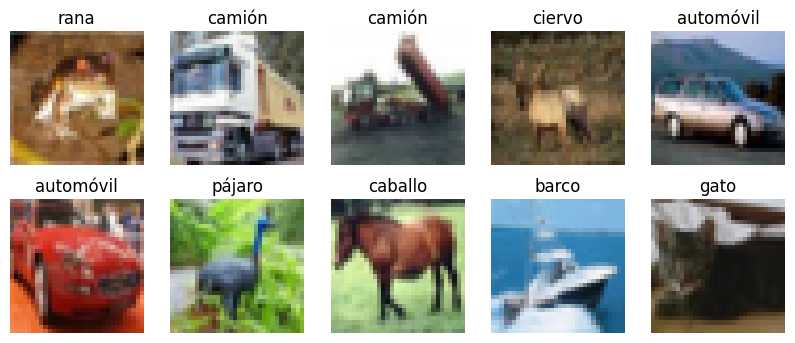

In [2]:
# 🔧 Importamos librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# 📥 Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 🧼 Normalización de imágenes
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 🎯 Codificación one-hot de las etiquetas
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 🔍 Mostrar algunas imágenes
class_names = ['avión','automóvil','pájaro','gato','ciervo','perro','rana','caballo','barco','camión']
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(tf.argmax(y_train[i]))])
    plt.axis('off')
plt.show()


# 🏗️ Parte 5: Construcción del Modelo CNN
Vamos a crear una red neuronal convolucional (CNN) utilizando Keras paso a paso. Esta red procesará las imágenes RGB de 32x32 píxeles del dataset CIFAR-10.

In [3]:
# 🔧 Construcción del modelo CNN
model = models.Sequential()

# 🧱 Capa convolucional 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 🧱 Capa convolucional 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 🧱 Capa convolucional 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 🧾 Aplanamiento para conectar a capa densa
model.add(layers.Flatten())

# 🔗 Capa totalmente conectada (Dense)
model.add(layers.Dense(128, activation='relu'))

# 🔐 Dropout para regularización (opcional)
model.add(layers.Dropout(0.5))

# 🎯 Capa de salida (10 clases)
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilación del modelo
Antes de entrenar, se compila el modelo definiendo el optimizador, la función de pérdida y la métrica a seguir:

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
Vamos a entrenar el modelo usando el conjunto de entrenamiento, y validar con parte del mismo (validación interna):

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.2623 - loss: 1.9592 - val_accuracy: 0.4724 - val_loss: 1.4227
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.4791 - loss: 1.4360 - val_accuracy: 0.5578 - val_loss: 1.2411
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5494 - loss: 1.2682 - val_accuracy: 0.5868 - val_loss: 1.1649
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.5853 - loss: 1.1694 - val_accuracy: 0.6175 - val_loss: 1.0869
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6160 - loss: 1.0875 - val_accuracy: 0.6361 - val_loss: 1.0350
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.6476 - loss: 1.0168 - val_accuracy: 0.6585 - val_loss: 0.9637
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6618 - loss: 0.9676 - val_accuracy: 0.6705 - val_loss: 0.9368
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6802 - loss: 0.9162 - 

# Parte 6: Visualización del entrenamiento
Ahora que entrenaste el modelo, vamos a visualizar cómo fue el rendimiento en entrenamiento y validación:

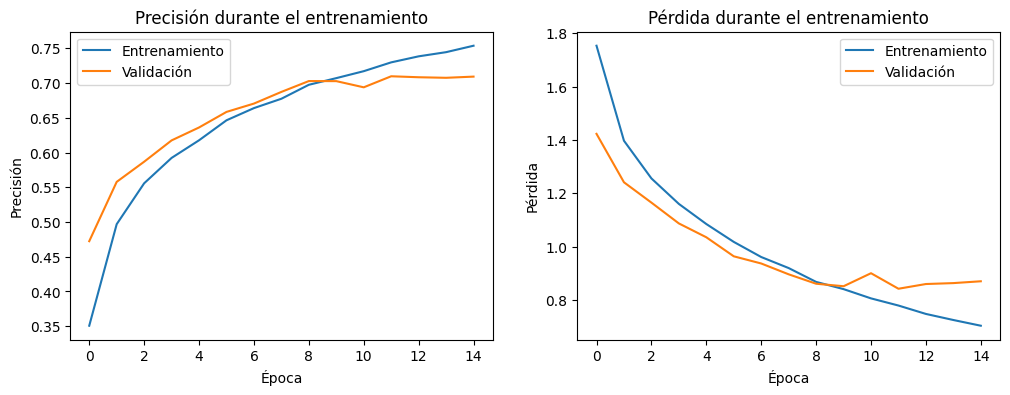

In [6]:
import matplotlib.pyplot as plt

# Precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Parte 7: Evaluación del modelo con datos de prueba
Vamos a probar el modelo con los datos de test que se reservaron:

In [7]:
# Evaluamos el modelo con datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Precisión en datos de prueba: {test_accuracy*100:.2f}%")

313/313 - 5s - 15ms/step - accuracy: 0.7008 - loss: 0.8811
Precisión en datos de prueba: 70.08%


# Parte 8: Matriz de confusión y predicciones
Esto te ayudará a ver qué clases se confunden entre sí:

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


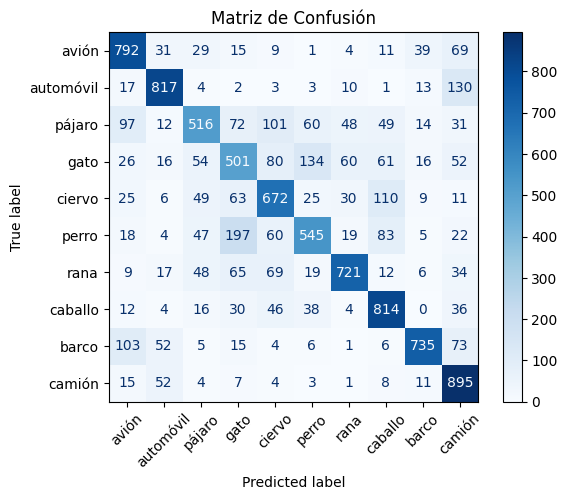

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones del modelo
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()